In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_excel("dataset-servicios.xlsx")
df.head()

,num_exp,cod_est,cod_cli,num_pol,locali,cod_com,nom_com,cod_enc,per_aut,cti_pro_a,...,fechor,marca,color,año,placa,inciso,tel_cas,tel_ofi,cel_con,num
0,20000001,C,61,980755,ASISTO,2,"SEGUROS EL ROBLE, S.A.",BVB,NaN,1.0,...,01-Jan-10 00:19:36,BMW 320I,PLATEADO,2006.0,P-724BHS,1.0,NaN,NaN,55106421,1
1,20000004,C,1,3035,ASME,2,"SEGUROS EL ROBLE, S.A.",JSR,NaN,3.0,...,01-Jan-10 01:20:01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57026077,4
2,20000007,C,61,41356,ASISTO,2,"SEGUROS EL ROBLE, S.A.",BVB,NaN,1.0,...,01-Jan-10 03:03:48,COROLLA,BEIGE,2003.0,P-988DBL,1.0,NaN,NaN,57032910,7
3,20000015,C,NaN,AUTORIZADO,NaN,2,"SEGUROS EL ROBLE, S.A.",DQG,NaN,3.0,...,01-Jan-10 07:52:27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52073868,15
4,20000019,C,61,975636,ASISTO,2,"SEGUROS EL ROBLE, S.A.",DVR,NaN,5.0,...,01-Jan-10 09:54:38,HYUNDAI SANTA FE GLS,CELESTE,2008.0,P-892DLY,1.0,NaN,NaN,5024218588,19


### Análisis de Datos

#### Extraer tipos de columnas: numéricas contínuas, numéricas discretas y categóricas

In [6]:
def getDataColTypes(df):
    categoricas = []
    continuas = []
    discretas = []

    for colName in df.columns:
        if (df[colName].dtype == 'object'):
            categoricas.append(colName)
        else:
            if ((df[colName].dtype == 'int64') or (df[colName].dtype == 'float64')):
                if (len(df[colName])<=30):
                    discretas.append(colName)
                else:
                    continuas.append(colName)

    return discretas, continuas, categoricas


In [7]:
discretas, continuas, categoricas = getDataColTypes(df)

In [8]:
discretas, continuas, categoricas
#vemos que no hay discretas porque sale vacio []

([],
 ['num_exp',
  'cod_com',
  'cti_pro_a',
  'cod_pro',
  'cod_zon',
  'cod_pre',
  'cod_dep',
  'cti_pro_b',
  'estimado',
  'Sin IVA',
  'xcontacto',
  'año',
  'inciso',
  'tel_cas',
  'tel_ofi',
  'num'],
 ['cod_est',
  'cod_cli',
  'num_pol',
  'locali',
  'nom_com',
  'cod_enc',
  'per_aut',
  'tit_pol',
  'ben_ser',
  'lug_asi',
  'num_lin',
  'nom_pro',
  'mes',
  'fec_ser',
  'hor_ser',
  'des_pre',
  'nom_dep',
  'nti_pro',
  'let_tip',
  'let_cat',
  'cod_are',
  'fechor',
  'marca',
  'color',
  'placa',
  'cel_con'])

In [6]:
categoricas.remove('Attrition_Flag')
continuas.remove('CLIENTNUM')

In [7]:
categoricas, continuas

(['Gender',
  'Education_Level',
  'Marital_Status',
  'Income_Category',
  'Card_Category'],
 ['Customer_Age',
  'Dependent_count',
  'Months_on_book',
  'Total_Relationship_Count',
  'Months_Inactive_12_mon',
  'Contacts_Count_12_mon',
  'Credit_Limit',
  'Total_Revolving_Bal',
  'Avg_Open_To_Buy',
  'Total_Amt_Chng_Q4_Q1',
  'Total_Trans_Amt',
  'Total_Trans_Ct',
  'Total_Ct_Chng_Q4_Q1',
  'Avg_Utilization_Ratio'])

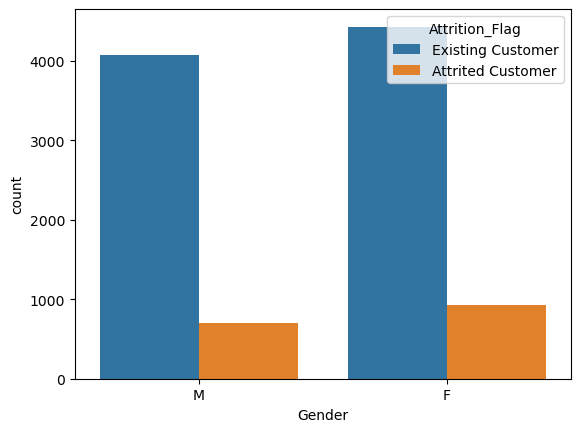

In [8]:
#Haremos una grafica de barras para ver como se comporta la clasificacion
sns.countplot(x=df['Gender'],hue=df['Attrition_Flag'])
plt.show()

In [9]:
#Lo hacemos una función
def plotCatColumn_vs_Target(df,colname,target):
    plt.figure(figsize=(10,5))
    plot = sns.countplot(x=df[colname], hue=df[target])
    plt.title(f'{colname} vs {target}')

    for p in plot.patches:
        plt.annotate(p.get_height(),(p.get_x()+p.get_width()/3,p.get_height()+50))
    plt.show()

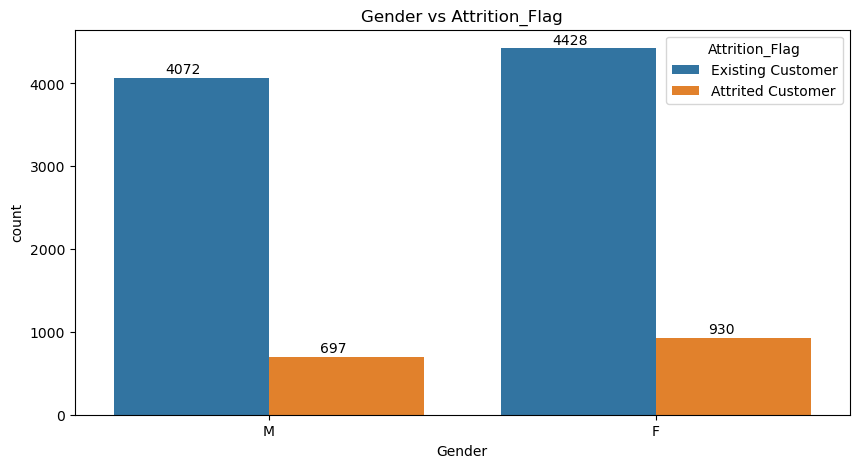

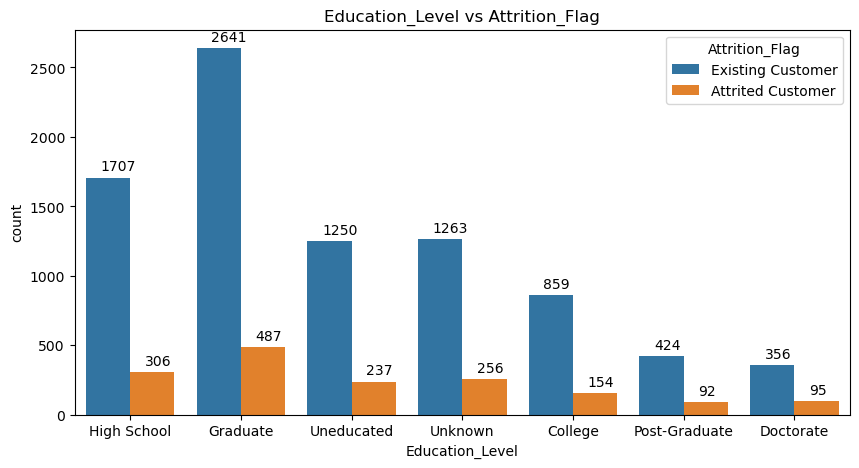

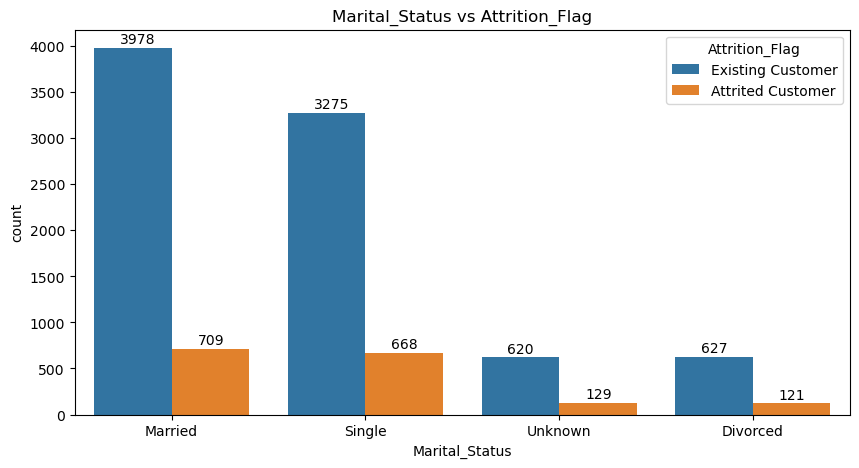

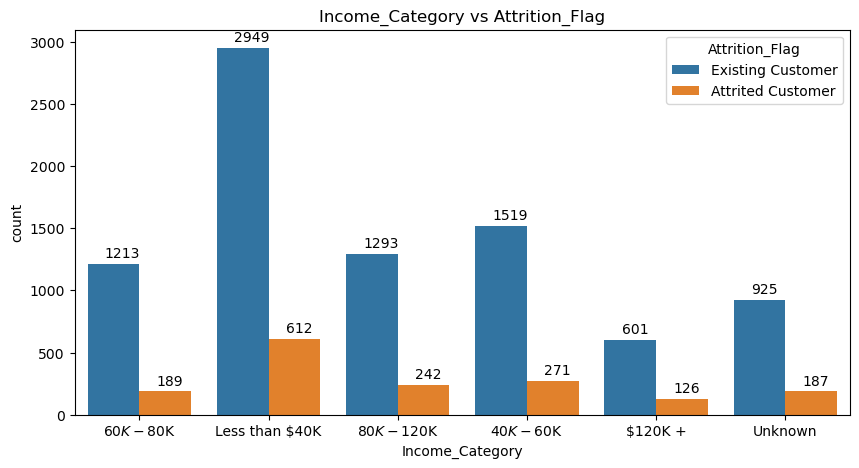

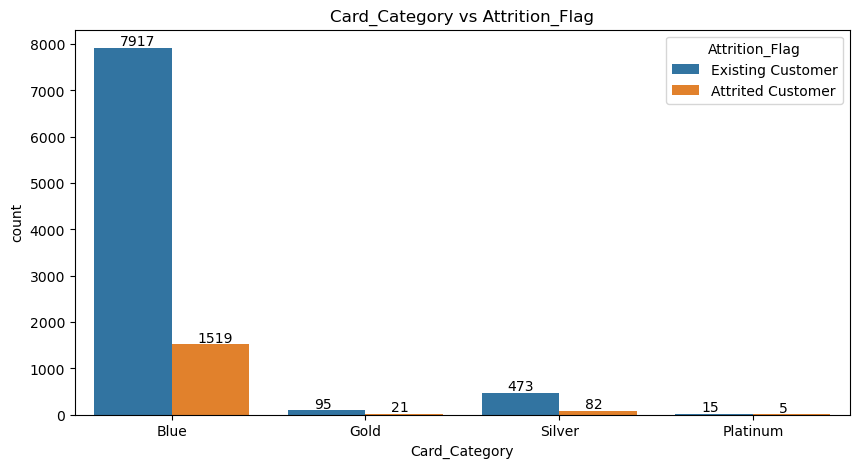

In [10]:
for catCol in categoricas:
    plotCatColumn_vs_Target(df,catCol,'Attrition_Flag')

#rapidamente vemos que la data está desbalanceada 
#recordemos que con un problema de clasificacion se debe verificar el balance

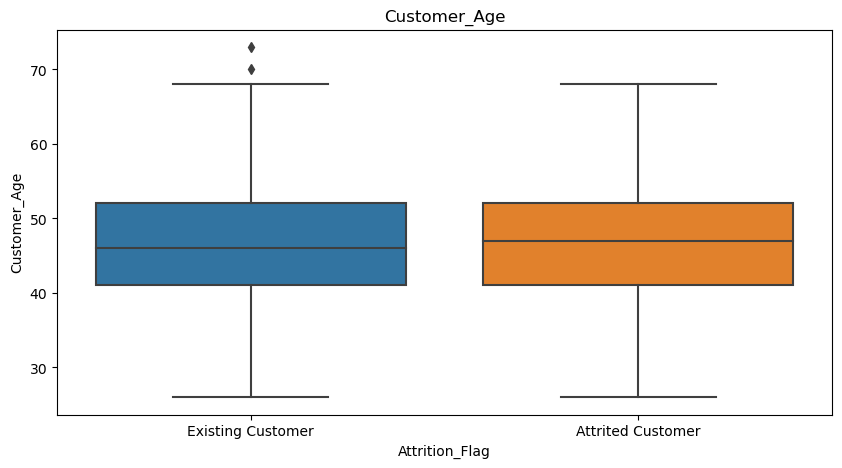

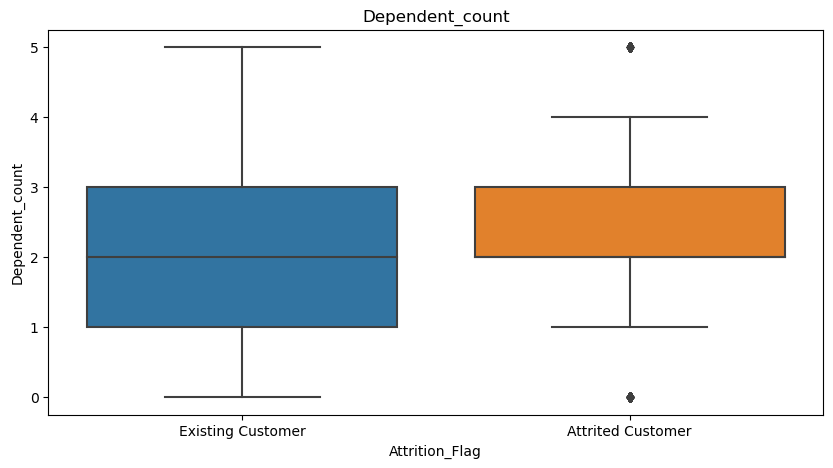

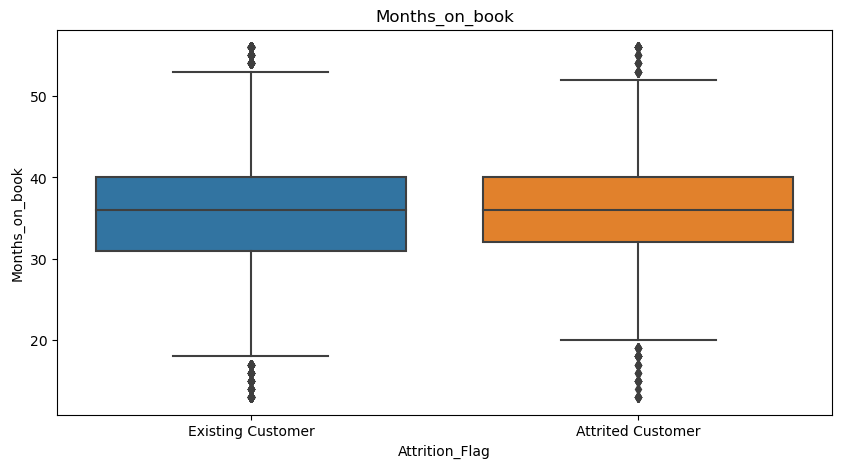

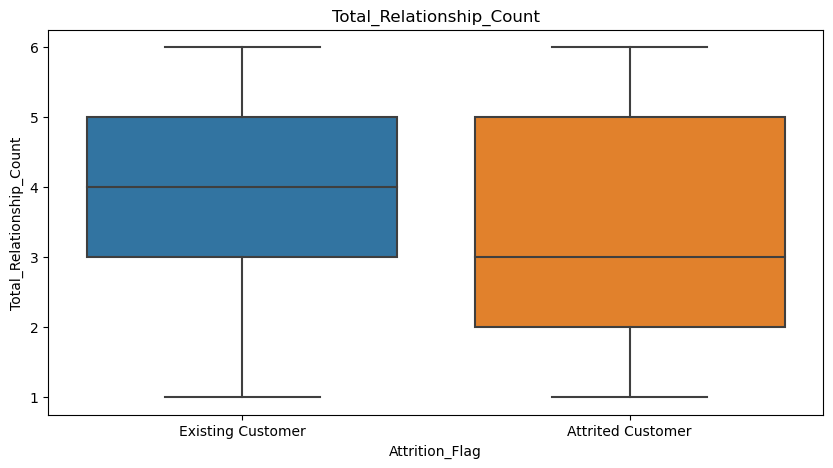

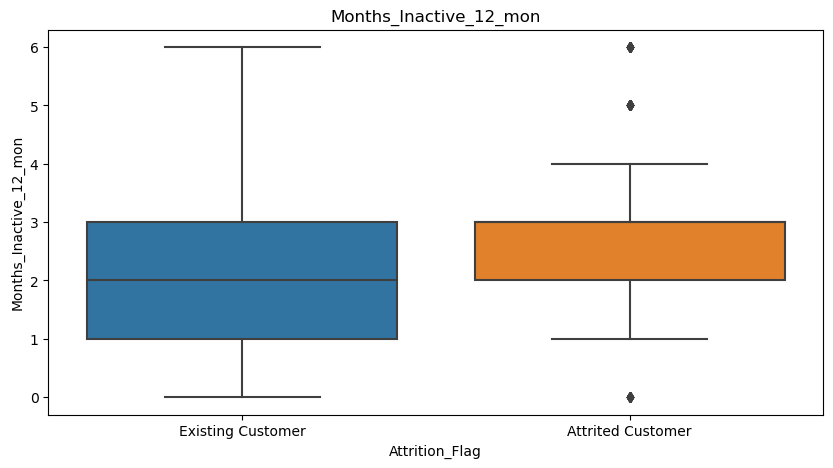

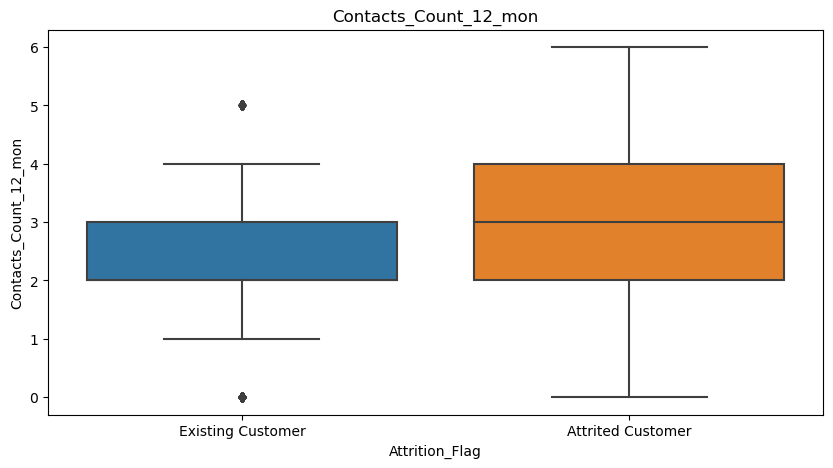

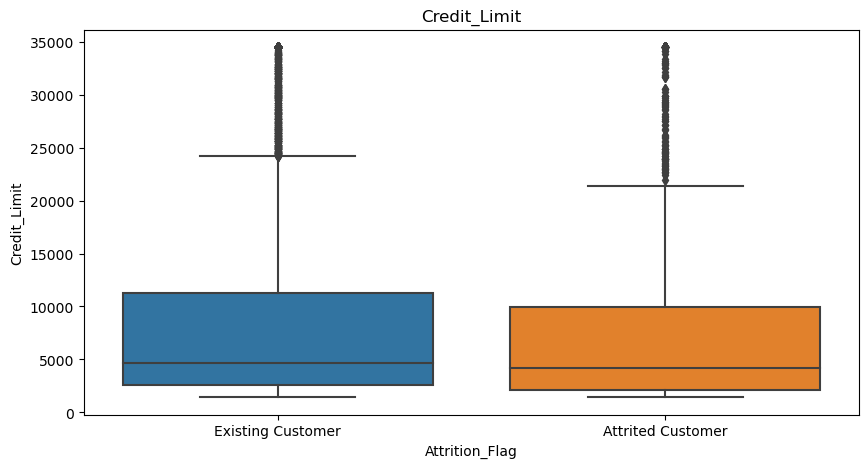

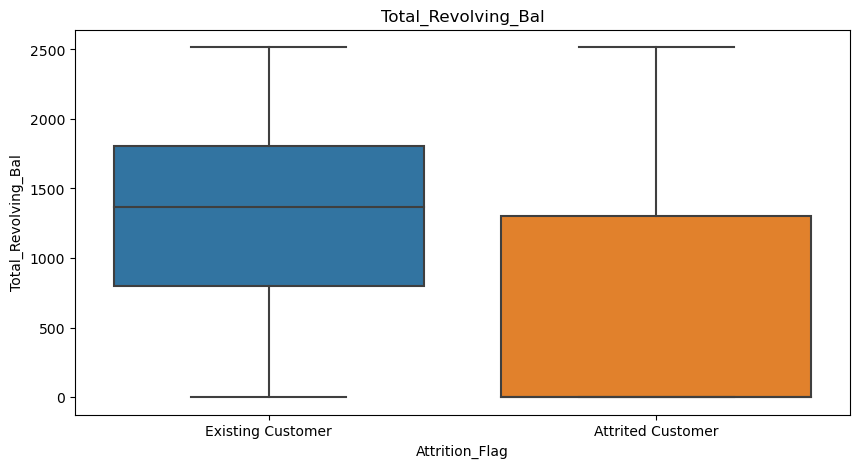

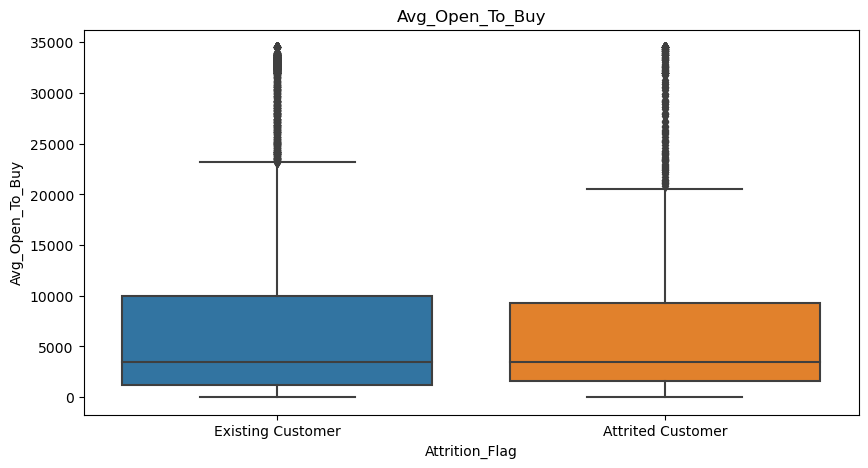

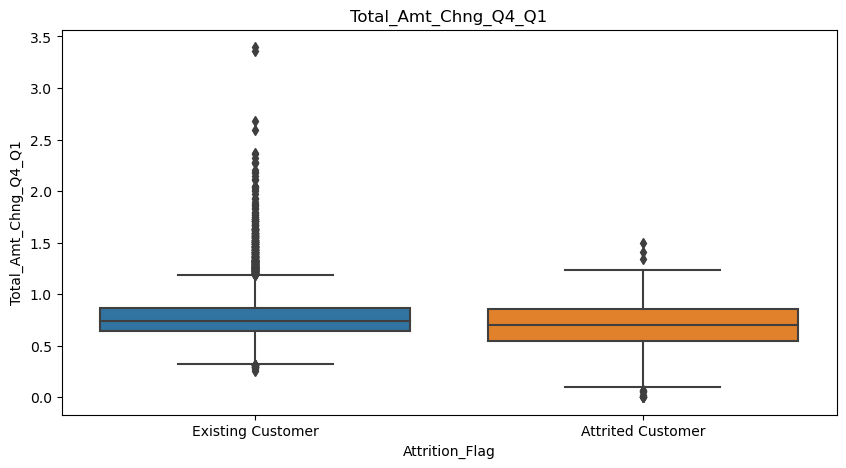

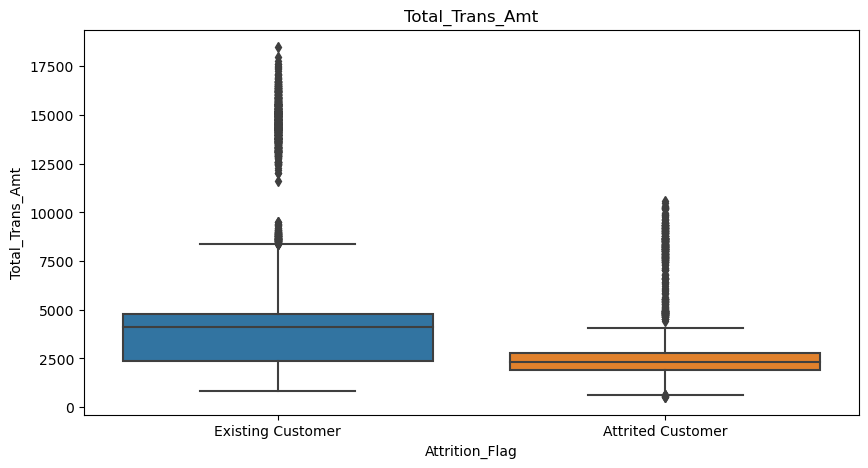

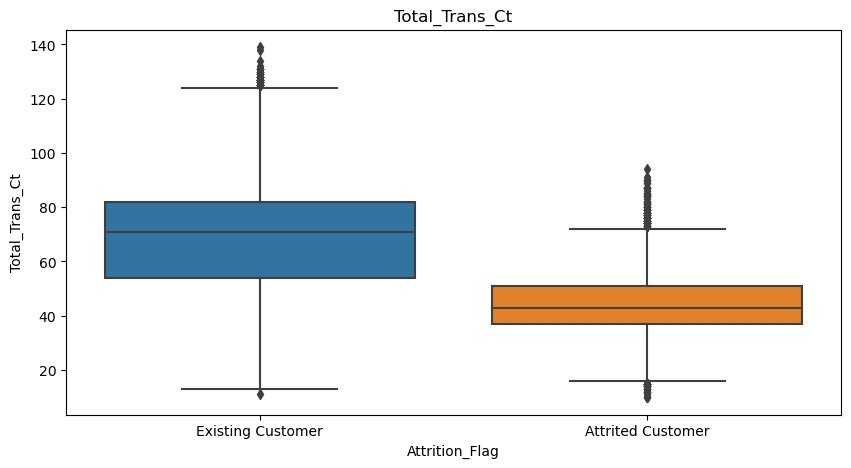

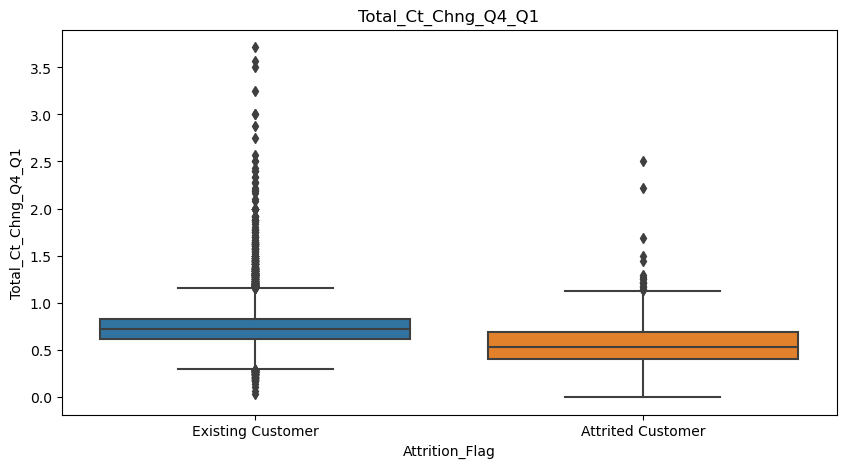

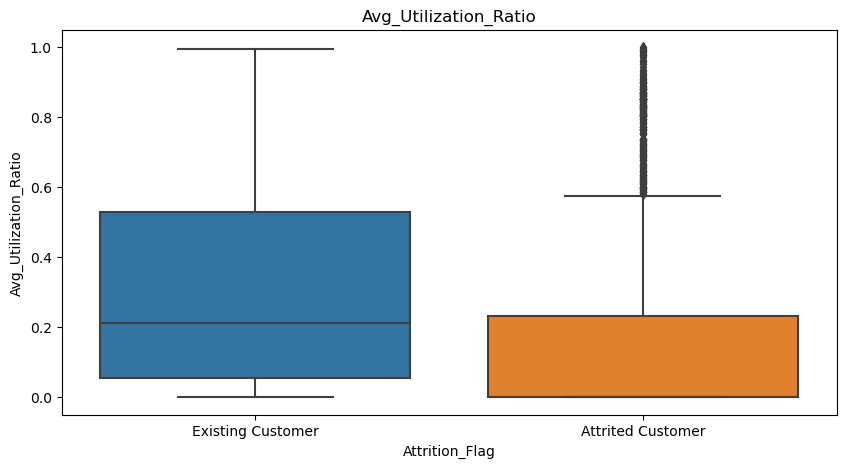

In [11]:
#que pasa cuando son numericas contra una categorica

for colName in continuas:
    plt.figure(figsize=(10,5))
    sns.boxplot(x=df['Attrition_Flag'], y=df[colName])
    plt.title(colName)
    plt.show()

### 2. Balanceo de datos

In [12]:
df['Attrition_Flag'].value_counts()

#lo ideal es una relacion de 1:3, siendo 1 parte la que menos tiene y 2 partes la que mas tiene.

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

In [13]:
df_attrited = df[df['Attrition_Flag']=='Attrited Customer']
df_attrited.shape

(1627, 21)

In [14]:
df_existing = df[df['Attrition_Flag']=='Existing Customer']
df_existing.shape

(8500, 21)

In [15]:
cantidadExisting = 2*df_attrited.shape[0]
cantidadExisting

3254

In [16]:
df_existing = df_existing.sample(n=cantidadExisting, random_state=2023)

In [17]:
df = pd.concat([df_attrited,df_existing])
df.shape

(4881, 21)

### 3. Ingenieria de caracteristicas

##### 3.1 Imputacion de variables

In [18]:
df.isnull().mean()
#No hay necesidad de imputacion

CLIENTNUM                   0.0
Attrition_Flag              0.0
Customer_Age                0.0
Gender                      0.0
Dependent_count             0.0
Education_Level             0.0
Marital_Status              0.0
Income_Category             0.0
Card_Category               0.0
Months_on_book              0.0
Total_Relationship_Count    0.0
Months_Inactive_12_mon      0.0
Contacts_Count_12_mon       0.0
Credit_Limit                0.0
Total_Revolving_Bal         0.0
Avg_Open_To_Buy             0.0
Total_Amt_Chng_Q4_Q1        0.0
Total_Trans_Amt             0.0
Total_Trans_Ct              0.0
Total_Ct_Chng_Q4_Q1         0.0
Avg_Utilization_Ratio       0.0
dtype: float64

#### 3.2 Codificacion de variables categoricas

In [19]:
df['Gender'].value_counts()

F    2604
M    2277
Name: Gender, dtype: int64

In [20]:
ohe_gender = pd.get_dummies(df['Gender'],drop_first=True)
#Le caemos encima a la columna
df['Gender'] = ohe_gender

In [21]:
df['Marital_Status'].value_counts()

Married     2208
Single      1943
Unknown      370
Divorced     360
Name: Marital_Status, dtype: int64

In [22]:
for catCol in categoricas:
    if (catCol != 'Gender'):
        freq_encoder_dict = df[catCol].value_counts().to_dict()
        df[catCol] = df[catCol].map(freq_encoder_dict)

In [23]:
#codificamos la variable target tambien
ohe_attrition = pd.get_dummies(df['Attrition_Flag'],drop_first=True)
#Le caemos encima a la columna
df['Attrition_Flag'] = ohe_attrition
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
21,708508758,0,62,0,0,1498,2208,1713,4548,49,...,3,3,1438.3,0,1438.3,1.047,692,16,0.600,0.000
39,708300483,0,66,0,0,245,2208,540,4548,56,...,4,3,7882.0,605,7277.0,1.052,704,16,0.143,0.077
51,779471883,0,54,0,1,1498,2208,1713,4548,40,...,3,1,1438.3,808,630.3,0.997,705,19,0.900,0.562
54,714374133,0,56,1,2,1498,2208,369,4548,36,...,3,3,15769.0,0,15769.0,1.041,602,15,0.364,0.000
61,712030833,0,48,1,2,1498,2208,646,265,35,...,4,4,34516.0,0,34516.0,0.763,691,15,0.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3675,711580908,1,52,0,3,740,1943,864,4548,42,...,3,2,3028.0,2258,770.0,1.058,4119,81,0.884,0.746
8947,718457058,1,43,1,4,950,2208,864,4548,35,...,1,1,3442.0,2517,925.0,0.620,7801,74,0.644,0.731
3511,717451833,1,45,0,3,715,360,540,4548,36,...,3,2,20356.0,2517,17839.0,0.607,4547,67,0.861,0.124
8506,708224133,1,61,1,0,715,1943,864,4548,49,...,2,3,2228.0,1480,748.0,0.533,4431,71,0.651,0.664


### 4. Construccion de Modelos

In [24]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

In [25]:
# Seleccionamos predictores y target

X = df.drop(['Attrition_Flag','CLIENTNUM'], axis=1)
y = df['Attrition_Flag']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle = True, random_state = 2023)

Scaler de datos

In [31]:
scaler = StandardScaler()
scaler.fit(X_train)

#fit para configurar el mecanismo

X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

Regresion Logistica

In [32]:
from sklearn.linear_model import LogisticRegression

logit = LogisticRegression()
logit.fit(X_train_std, y_train)

logit_preds = logit.predict(X_test_std)
logit_preds


array([1, 1, 1, ..., 1, 0, 1], dtype=uint8)

In [33]:
acc = round(accuracy_score(y_test,logit_preds), 5)
roc_auc = round(roc_auc_score(y_test,logit_preds),5)

In [35]:
print(f'Accuracy: {acc}')
print(f'ROC-AUC: {roc_auc}')

Accuracy: 0.87099
ROC-AUC: 0.84905


In [48]:
from sklearn.model_selection import GridSearchCV,KFold

logit = LogisticRegression(solver='saga')

hyperparams_grid = {'penalty':['l1','l2','elasticnet',None],
                    'C':[0.01,0.1,1,10],
                    'fit_intercept':[True,False],

                    }

grid_search = GridSearchCV(estimator=logit, param_grid=hyperparams_grid,scoring=['roc_auc','accuracy'],refit='roc_auc',n_jobs=-1,
                           cv=KFold(n_splits=20,shuffle=True,random_state=2023))

grid_search.fit(X_train_std,y_train)

#refit determina que quiero maximizar, en este caso es roc_auc, pero podriamos poner accuracy, depende del modelo del negocio

accuracies = grid_search.cv_results_['mean_test_accuracy']
roc_aucs = grid_search.cv_results_['mean_test_roc_auc']

mean_acc = np.mean([x for x in accuracies if not np.isnan(x)])
mean_roc_aucs = np.mean([x for x in roc_aucs if not np.isnan(x)])

print(f'Mejores HyperParametros: {grid_search.best_params_}')
print(f'Mejor metrica: {grid_search.best_score_}')
print(f'Mean Accuracy: {mean_acc}')
print(f'Mean ROC_AUC: {mean_roc_aucs}')

#grid_search.predict() para usar el modelo, ya usa el mejor.

Mejores HyperParametros: {'C': 1, 'penalty': 'l1'}
Mejor metrica: 0.9228309663167066
Mean Accuracy: 0.8530286807705538
Mean ROC_AUC: 0.9177201458665879


c:\Users\pablo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
160 fits failed out of a total of 320.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\pablo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\pablo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1471, in fit
    raise ValueError(
ValueError: l1_ratio must be between 0 and 1; got (l1_ratio=None)

--------------------------------------------------------------------------------
80 fits failed with the following

#### Random Forest

In [49]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier()

hyperparams_grid = {'n_estimators':[1000,2500,5000],
                    'criterion':['gini','entropy','log_loss'],
                    'max_depth':[10,25],
                    'bootstrap':[True,False]}

grid_search = GridSearchCV(estimator=random_forest, param_grid=hyperparams_grid,scoring=['roc_auc','accuracy'],refit='roc_auc',n_jobs=-1,
                           cv=KFold(n_splits=20,shuffle=True,random_state=2023))

grid_search.fit(X_train_std,y_train)

#refit determina que quiero maximizar, en este caso es roc_auc, pero podriamos poner accuracy, depende del modelo del negocio

accuracies = grid_search.cv_results_['mean_test_accuracy']
roc_aucs = grid_search.cv_results_['mean_test_roc_auc']

mean_acc = np.mean([x for x in accuracies if not np.isnan(x)])
mean_roc_aucs = np.mean([x for x in roc_aucs if not np.isnan(x)])

print(f'Mejores HyperParametros: {grid_search.best_params_}')
print(f'Mejor metrica: {grid_search.best_score_}')
print(f'Mean Accuracy: {mean_acc}')
print(f'Mean ROC_AUC: {mean_roc_aucs}')

c:\Users\pablo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
240 fits failed out of a total of 720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\pablo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\pablo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "c:\Users\pablo\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "c:\Users\pablo\anaconda3\lib\site-packages

Mejores HyperParametros: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 25, 'n_estimators': 1000}
Mejor metrica: 0.9886571243104607
Mean Accuracy: 0.9498082215342274
Mean ROC_AUC: 0.9871097557954066
